In [3]:
# data analysis
import numpy as np
import pandas as pd
import sys
import glob
import os,time

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# own dataclass
from imp import reload
import coronadataclass as cdc; reload(cdc);

In [4]:
# load data
data = cdc.CoronaData(download_data = True)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  4  4
  5  7  7  7 11 16 21 22 22 22 24 24 40 40 74 84 94]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 4]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  12  23  33  38  42
  51  55  59  64  70  76  89 104 123 146 174]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 4 5 5 6]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

  52  67  92  94 127 163 187 201 218 242 264]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 4 8]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   2   2   2   2   3
  15  15  20  33  40  64  75  99 114 146 152]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 4 4 4 4 7]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  5  5  5  7 10 10]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

 150 196 196 256 285 294 327 366 402 456 495]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1
  1  1  1  2  2  2  2  4  6  6  8 10 14 19 20 21 24]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   1   1   1   1   1   1   1   1   1   1   1   1  27  27  27  27  21
  27  32  32  32  39  41  56  56  80  95 102]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  1  3  3  3  5  9 13]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0 

[  0   0   0   0   0   0   0   0   1   1   1   2   3   3   3   3   3   3
   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3
   3   3   3   3   5   5  28  30  31  34  39  43  56  62  73  82 102 113
 119 142 156 194 244 330 396 499 536 657 727]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  1  2  2  2  2  3  3  4  5  4  7 10 10 12 20]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4 13 13 14 14 15 20 23 27 27 40 43 45]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   2   2   2   2   4   4   6  19  27  34  34  69  96 117
 134 172 227 311 369 450 514 579 686 790 893]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  3  3  3 12 17 19 23]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[   0    0    0    3    4    4    4    7    8    8    8    8    8   10
   12   12   12   16   16   18   18   18   19   19   22   22   22   22
   22   22   22   22   22   22   22   22   23   23   25   29   29   36
   50   50   83   93   99  117  129  149  149  197  238  428  566  673
  790  900 1030 1183 1306 1518 1624 1796 2031]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  2  2  2  3  4 10 14 16 20 23]
[  0 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2   2   4
   4   4   6   6   6  12  15  16  16  16  16  16  18  18  18  19  19  22
  22  24  39  48  48  52  55  66  84  99 109]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  2  2  2  2  2  2  2
  9  9  9  9  9  9  9  9 12 12 12 12 17 17 17 17 23]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    2    2    2    4    4    4    5
    5    5    6    6    6    6   16   19   20   28   31   53  136  236
  299  454  501  730  776  875  972 1063 1201]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

 253 275 275 286 341 383 414 442 480 528 562]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 3 4 5 6]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 10]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   1   1   1   3   3   7  13  17  24  38  51
  62

[  0   2   2   2   2   2   2   2   2   2   6   6   8   8   8  10  10  13
  13  14  15  15  16  16  16  16  16  16  16  16  16  16  16  16  16  16
  16  16  16  16  16  16  16  16  16  18  30  30  31  38  39  47  53  56
  61  66  75  85  91  94 113 123 134 141 153]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  6  6  7  7
  7  7  7  7  7  7 14 14 14 14 16 16 16 16 16 16 16 16 16 16 16 16 16 16
 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 20]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  7 16 16 19
 26 30 30 31 35 38 38 39 41 44 47 48 52 59 59 59 84]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

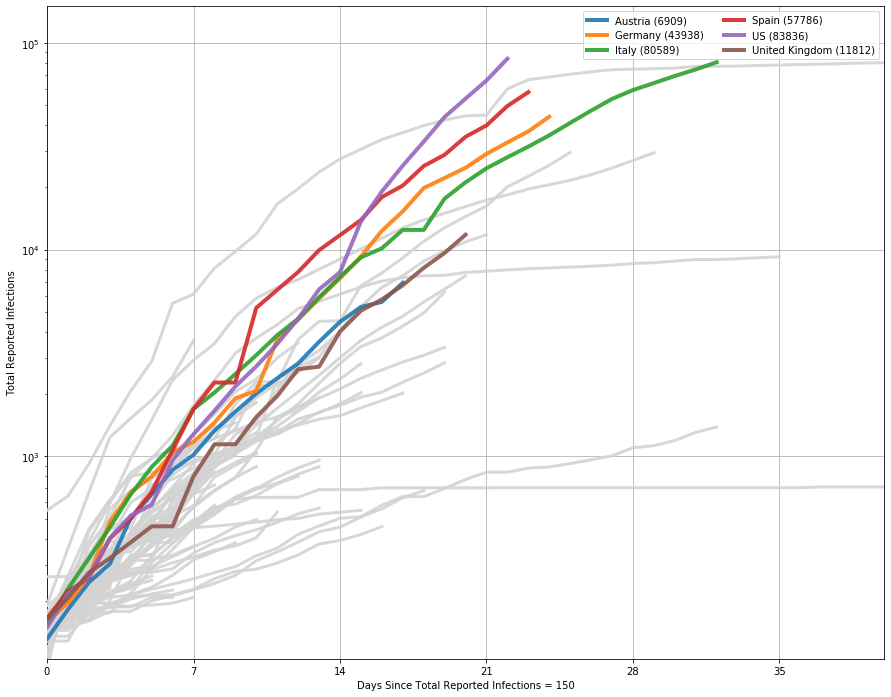

In [5]:
threshold  = 150

colornames       = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]
x                = np.arange(len(data))
fig, ax          = plt.subplots()
scidx            = 0

specialcountries = ['Austria','Italy','Germany','Spain','US', 'United Kingdom']

for country,countrydata in data:
    totinf = np.nan_to_num(countrydata['Confirmed'])
    if totinf[-1] >= threshold:
        startday = np.argmin((totinf-threshold)**2)
        c  = 'lightgray'
        z  = 100
        lw = 3
        lbl = None
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
            lbl    = country + ' ({})'.format(totinf[-1])
        ax.plot(x[:len(totinf[startday:])], totinf[startday:], c = c, zorder = z, lw = lw, alpha = .9, label = lbl)

# exponential plots with doubling time in days
#for doublingtime in np.arange(2,6):
#    ax.plot(x,150 * np.power(2,x/doublingtime), lw = 10, zorder = 80, c = 'black',alpha = .4)

plt.legend(ncol = 2)
plt.xlim([0,40])
ax.xaxis.set_major_locator(MultipleLocator(7))
plt.ylim([threshold*.7,1.5e5])
plt.xlabel(r'Days Since Total Reported Infections = {}'.format(threshold))
plt.ylabel(r'Total Reported Infections')
plt.yscale('log')
plt.grid()
plt.show()

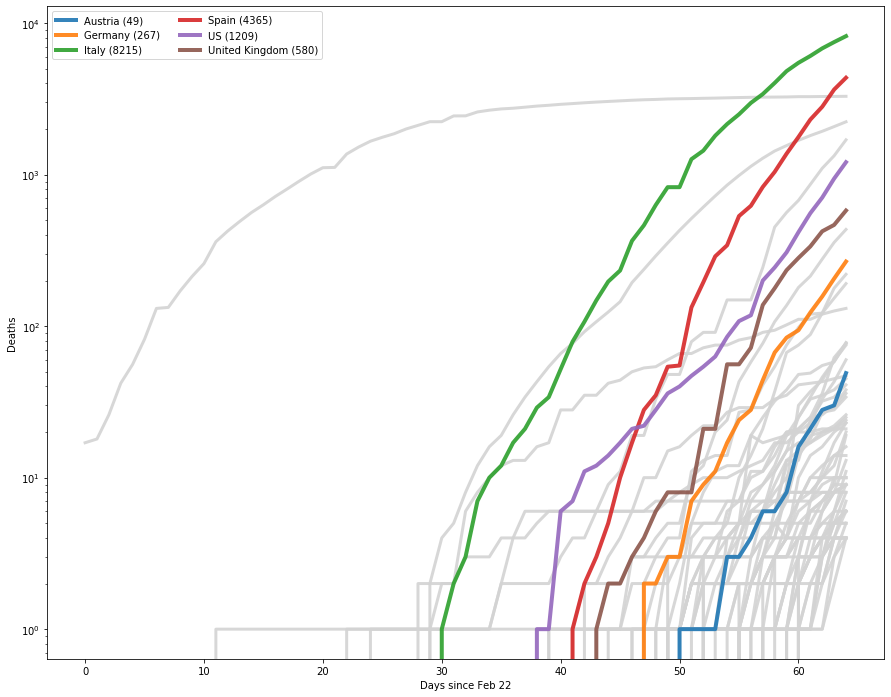

In [6]:
scidx = 0
lgnd = []
fig, ax          = plt.subplots()
dthreshold  = 3
for country,countrydata in data:
    deaths = np.nan_to_num(countrydata['Deaths'])
    if deaths[-1] > dthreshold:
        lgnd.append(country + ' ({:.0f})'.format(deaths[-1]))
        c  = 'lightgray'
        z  = 100
        lw = 3
        lbl = None
        if country in specialcountries:
            c      = colornames[scidx % len(colornames)]
            z      = 101 + scidx
            lw     = 4
            scidx += 1
            lbl    = country + ' ({})'.format(deaths[-1])
        ax.plot(deaths, c = c, zorder = z, lw = lw, alpha = .9, label = lbl)

plt.legend(ncol = 2)
plt.yscale('log')
plt.xlabel(r'Days since Feb 22')
plt.ylabel(r'Deaths')
plt.show()